
<p style="text-align: center;font-size: 18px;">
    <span style="font-weight: bold;">Microbiome Data Science</span>
</p>
<p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; background-color: #ffc627;">
    Sequencing Data Processing
</span></p>
<p style="text-align: center; font-size: 18px;">
    
</p>

## Data files

## From Qiita to Qiime2

In [1]:
! qiime tools import \
  --type 'SampleData[PairedEndSequencesWithQuality]' \
  --input-path dwdss \
  --input-format CasavaOneEightSingleLanePerSampleDirFmt \
  --output-path demux-paired-end.qza


Imported dwdss as CasavaOneEightSingleLanePerSampleDirFmt to demux-paired-end.qza


In [ ]:
! qiime dada2 denoise-paired \
  --i-demultiplexed-seqs demux-paired-end.qza \
  --p-trim-left-f 13 \
  --p-trim-left-r 13 \
  --p-trunc-len-f 150 \
  --p-trunc-len-r 150 \
  --o-table table.qza \
  --o-representative-sequences rep-seqs.qza \
  --o-denoising-stats denoising-stats.qza

In [ ]:
!qiime feature-table summarize \
  --i-table table.qza \
  --o-visualization table.qzv \
  --m-sample-metadata-file metadata.tsv
!qiime feature-table tabulate-seqs \
  --i-data rep-seqs.qza \
  --o-visualization rep-seqs.qzv

In [15]:
!qiime phylogeny align-to-tree-mafft-fasttree \
  --i-sequences 10251rep-seqs.qza \
  --o-alignment aligned-rep-seqs.qza \
  --o-masked-alignment masked-aligned-rep-seqs.qza \
  --o-tree 10251unrooted-tree.qza \
  --o-rooted-tree 102511rooted-tree.qza

Saved FeatureData[AlignedSequence] to: aligned-rep-seqs.qza
Saved FeatureData[AlignedSequence] to: masked-aligned-rep-seqs.qza
Saved Phylogeny[Unrooted] to: 10251unrooted-tree.qza
Saved Phylogeny[Rooted] to: 102511rooted-tree.qza


## Taxonomic analysis

In [6]:
!curl -sL \
  "https://data.qiime2.org/2021.2/common/gg-13-8-99-515-806-nb-classifier.qza" > \
  "gg-13-8-99-515-806-nb-classifier.qza"

In [ ]:
!qiime feature-classifier classify-sklearn \
  --i-classifier gg-13-8-99-515-806-nb-classifier.qza \
  --i-reads 10251rep-seqs.qza \
  --o-classification taxonomy.qza

!qiime metadata tabulate \
  --m-input-file taxonomy.qza \
  --o-visualization taxonomy.qzv

^C

Aborted!


### Barplot

In [30]:
!qiime taxa barplot \
  --i-table table.qza \
  --i-taxonomy taxonomy.qza \
  --m-metadata-file metadata.tsv \
  --o-visualization barplot.qzv

Saved Visualization to: barplot.qzv


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline


In [4]:
from qiime2 import Metadata, Artifact

In [5]:
metadata = Metadata.load('metadata.tsv')
table = Artifact.load('table.qza')
taxonomy = Artifact.load('taxonomy.qza')

In [12]:
from qiime2.plugins.taxa.methods import collapse


In [13]:
ranks = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [14]:
tables = {rank: collapse(table, taxonomy, i + 1).collapsed_table for i, rank in enumerate(ranks)}


In [15]:
rank = 'order'

In [16]:
df = tables[rank].view(pd.DataFrame)
df.head()

,Unassigned;__;__;__,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales,k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanomicrobiales,k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2,k__Bacteria;__;__;__,k__Bacteria;p__;c__;o__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__BPC015,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15,...,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__HA64,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__[Cerasicoccales],k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales,k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales],k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales],k__Bacteria;p__WPS-2;c__;o__,k__Bacteria;p__WWE1;c__[Cloacamonae];o__[Cloacamonales],k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales
CC10_28,0.0,0.0,0.0,0.0,0.0,0.0,243.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,13.0,0.0,2.0,0.0,0.0,0.0
CC11_34,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
CC12_40,0.0,0.0,0.0,0.0,0.0,0.0,422.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,22.0,0.0,2.0,0.0,0.0,0.0
CC13_46,0.0,0.0,0.0,0.0,0.0,0.0,126.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
CC14_52,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0


In [17]:
field = 'Material_type'

In [18]:
df[field] = df.index.map(metadata.get_column(field).to_series())


In [19]:
df = df.groupby(field).sum()
df.head()

,Unassigned;__;__;__,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales,k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanomicrobiales,k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2,k__Bacteria;__;__;__,k__Bacteria;p__;c__;o__,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__BPC015,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15,...,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__HA64,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__[Cerasicoccales],k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales,k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales],k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales],k__Bacteria;p__WPS-2;c__;o__,k__Bacteria;p__WWE1;c__[Cloacamonae];o__[Cloacamonales],k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales
Material_type,,,,,,,,,,,,,,,,,,,,,
Copper,38.0,0.0,34.0,9.0,0.0,0.0,5646.0,5.0,0.0,296.0,...,71.0,426.0,0.0,0.0,162.0,80.0,7.0,114.0,0.0,0.0
PVC,44.0,0.0,157.0,28.0,10.0,0.0,1591.0,237.0,0.0,1917.0,...,4.0,437.0,0.0,13.0,255.0,112.0,39.0,70.0,0.0,3.0
Steel,16.0,2.0,41.0,0.0,7.0,4.0,1490.0,67.0,4.0,1531.0,...,6.0,85.0,6.0,4.0,138.0,443.0,45.0,237.0,4.0,2.0


In [20]:
df = df.T
df.head()

Material_type,Copper,PVC,Steel
Unassigned;__;__;__,38.0,44.0,16.0
k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales,0.0,0.0,2.0
k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales,34.0,157.0,41.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales,9.0,28.0,0.0
k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanomicrobiales,0.0,10.0,7.0


In [21]:
def last_taxon(lineage):
    if lineage.startswith('Unassigned'):
        return 'Unassigned'
    elif lineage.endswith('__'):
        return 'Unassigned'
    else:
        return lineage.split(';')[-1].split('__')[1]

In [22]:
df.index = df.index.to_series().apply(last_taxon)
df.head()

Material_type,Copper,PVC,Steel
Unassigned,38.0,44.0,16.0
Cenarchaeales,0.0,0.0,2.0
Nitrososphaerales,34.0,157.0,41.0
Methanobacteriales,9.0,28.0,0.0
Methanomicrobiales,0.0,10.0,7.0


In [23]:
df = df.groupby(level=0).sum()
df.head()

Material_type,Copper,PVC,Steel
0319-7L14,3.0,16.0,0.0
34P16,40.0,45.0,30.0
AKIW781,4.0,16.0,6.0
AKYG1722,0.0,4.0,0.0
AKYG885,7.0,0.0,0.0


In [24]:
df = df / df.sum(axis=0) * 100
df.head()

Material_type,Copper,PVC,Steel
0319-7L14,0.000528,0.002836,0.000000
34P16,0.007041,0.007977,0.005826
AKIW781,0.000704,0.002836,0.001165
AKYG1722,0.000000,0.000709,0.000000
AKYG885,0.001232,0.000000,0.000000


In [25]:
df = df.drop('Unassigned', errors='ignore')

In [26]:
df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]
df.head()

Material_type,Copper,PVC,Steel
Sphingomonadales,40.062313,47.238028,36.296197
Caulobacterales,5.007745,14.660909,4.702675
MLE1-12,7.065833,5.469523,4.607907
Burkholderiales,6.689667,3.438771,6.941960
Enterobacteriales,5.903714,4.149073,5.967868


In [27]:
n = 9


In [28]:
df = df.iloc[:n]
df

Material_type,Copper,PVC,Steel
Sphingomonadales,40.062313,47.238028,36.296197
Caulobacterales,5.007745,14.660909,4.702675
MLE1-12,7.065833,5.469523,4.607907
Burkholderiales,6.689667,3.438771,6.941960
Enterobacteriales,5.903714,4.149073,5.967868
Legionellales,5.785073,2.074359,2.996460
[Saprospirales],3.276184,2.566093,4.912213
Rhizobiales,2.854427,1.298469,5.897375
Rhodobacterales,4.107199,1.507642,3.160168


In [29]:
others = 100 - df.sum(axis=0)
others.name = 'Others'
df = df.append(others)
df

Material_type,Copper,PVC,Steel
Sphingomonadales,40.062313,47.238028,36.296197
Caulobacterales,5.007745,14.660909,4.702675
MLE1-12,7.065833,5.469523,4.607907
Burkholderiales,6.689667,3.438771,6.941960
Enterobacteriales,5.903714,4.149073,5.967868
Legionellales,5.785073,2.074359,2.996460
[Saprospirales],3.276184,2.566093,4.912213
Rhizobiales,2.854427,1.298469,5.897375
Rhodobacterales,4.107199,1.507642,3.160168
Others,19.247844,17.597133,24.517178


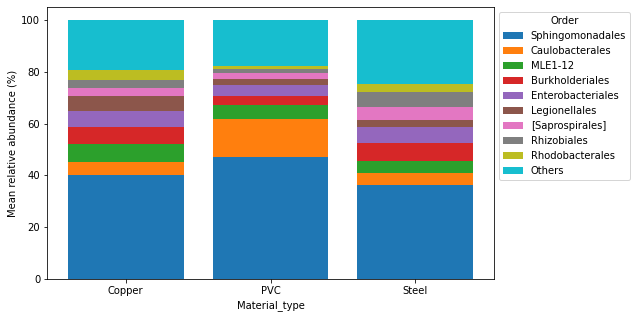

In [30]:
fig = plt.figure(figsize=(8, 5))
bottom = np.zeros(df.shape[1])
for taxon, datum in df.iterrows():
    plt.bar(df.columns, datum.values, bottom=bottom, label=taxon)
    bottom += datum
plt.legend(title=rank.capitalize(), bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel(field.replace('-', ' ').capitalize())
plt.ylabel('Mean relative abundance (%)');

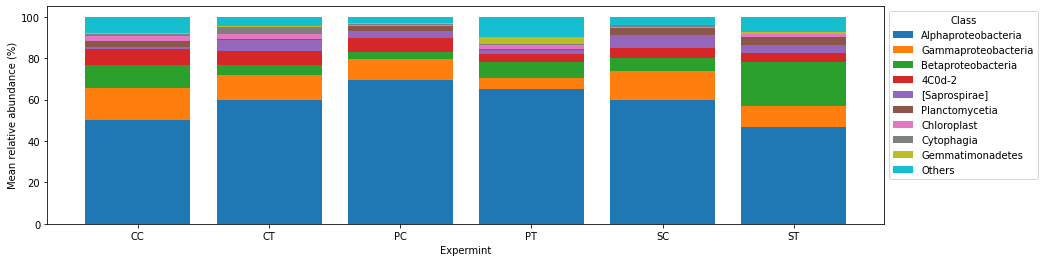

In [29]:
fig

## ANCOM

In [44]:
%%bash
qiime taxa collapse \
  --i-table 10251table.qza \
  --i-taxonomy taxonomy.qza \
  --p-level 3 \
  --o-collapsed-table collapsed-table.qza



Saved FeatureTable[Frequency] to: collapsed-table.qza


In [45]:
%%bash
qiime composition add-pseudocount \
  --i-table collapsed-table.qza \
  --o-composition-table comp-collapsed-table.qza



Saved FeatureTable[Composition] to: comp-collapsed-table.qza


In [46]:
%%bash
qiime composition ancom \
  --i-table comp-collapsed-table.qza \
  --m-metadata-file metadata.txt \
  --m-metadata-column experiment_title \
  --o-visualization ancom-experiment_title.qzv



Saved Visualization to: ancom-experiment_title.qzv


### Alpha and beta diversity analysis

In [66]:
!qiime diversity core-metrics-phylogenetic \
  --i-phylogeny 102511rooted-tree.qza \
  --i-table 10251table.qza \
  --p-sampling-depth 20102 \
  --m-metadata-file metadata.txt \
  --output-dir all_in_one

Saved FeatureTable[Frequency] to: all_in_one/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: all_in_one/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: all_in_one/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: all_in_one/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: all_in_one/evenness_vector.qza
Saved DistanceMatrix to: all_in_one/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: all_in_one/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: all_in_one/jaccard_distance_matrix.qza
Saved DistanceMatrix to: all_in_one/bray_curtis_distance_matrix.qza
Saved PCoAResults to: all_in_one/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: all_in_one/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: all_in_one/jaccard_pcoa_results.qza
Saved PCoAResults to: all_in_one/bray_curtis_pcoa_results.qza
Saved Visualization to: all_in_one/unweighted_unifrac_emperor.qzv
Saved Visualization to: all_in_one/weighted_unifrac_em

## Alpha diversity


In [69]:
%%bash
for metric in observed_features shannon pielou_e
do
  qiime diversity alpha \
    --i-table all_in_one/rarefied_table.qza \
    --p-metric $metric \
    --o-alpha-diversity ${metric}_vector.qza
done

Saved SampleData[AlphaDiversity] to: observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: shannon_vector.qza
Saved SampleData[AlphaDiversity] to: pielou_e_vector.qza


## Faith Phylogenetic Diversity

In [70]:
!qiime diversity alpha-group-significance \
  --i-alpha-diversity all_in_one/faith_pd_vector.qza \
  --m-metadata-file metadata.txt \
  --o-visualization all_in_one/faith-pd-group-significance.qzv

Saved Visualization to: all_in_one/faith-pd-group-significance.qzv


phylogeny-informed alpha diversity using the Faith's PD metric

In [75]:
!qiime diversity alpha-phylogenetic \
  --i-table all_in_one/rarefied_table.qza \
  --i-phylogeny 102511rooted-tree.qza \
  --p-metric faith_pd \
  --o-alpha-diversity faith_pd_vector.qza

Saved SampleData[AlphaDiversity] to: faith_pd_vector.qza


#### Evenness metrics

In [72]:
!qiime diversity alpha-group-significance \
  --i-alpha-diversity all_in_one/evenness_vector.qza \
  --m-metadata-file metadata.txt \
  --o-visualization all_in_one/evenness-group-significance.qzv

Saved Visualization to: all_in_one/evenness-group-significance.qzv


### Beta Diversity using unweighted UniFrac distances for expermint title (Utilities from A to E )

In [73]:
!qiime diversity beta-group-significance   \
  --i-distance-matrix all_in_one/unweighted_unifrac_distance_matrix.qza   \
  --m-metadata-file metadata.txt   --m-metadata-column experiment_title   \
  --o-visualization all_in_one/unweighted-unifrac-expermint-title-significance.qzv   \
  --p-pairwise

Saved Visualization to: all_in_one/unweighted-unifrac-expermint-title-significance.qzv


#### Alpha group significance

In [76]:
%%bash
for metric in observed_features shannon pielou_e faith_pd
do
  qiime diversity alpha-group-significance \
    --i-alpha-diversity ${metric}_vector.qza \
    --m-metadata-file metadata.txt \
    --o-visualization ${metric}_group_significance.qzv
done

Saved Visualization to: observed_features_group_significance.qzv
Saved Visualization to: shannon_group_significance.qzv
Saved Visualization to: pielou_e_group_significance.qzv
Saved Visualization to: faith_pd_group_significance.qzv


In [77]:
%%bash
for metric in observed_features shannon pielou_e
do
  qiime diversity alpha \
    --i-table all_in_one/rarefied_table.qza \
    --p-metric $metric \
    --o-alpha-diversity ${metric}_vector.qza
done

Saved SampleData[AlphaDiversity] to: observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: shannon_vector.qza
Saved SampleData[AlphaDiversity] to: pielou_e_vector.qza


#### Alpha rarefaction plotting

In [80]:
!qiime diversity alpha-rarefaction \
  --i-table 10251table.qza \
  --i-phylogeny 102511rooted-tree.qza \
  --p-max-depth 100000 \
  --m-metadata-file metadata.txt \
  --o-visualization alpha-rarefaction.qzv

Saved Visualization to: alpha-rarefaction.qzv


#### Beta Diversity

In [81]:
%%bash
for metric in jaccard braycurtis
do
  qiime diversity beta \
    --i-table all_in_one/rarefied_table.qza \
    --p-metric $metric \
    --o-distance-matrix ${metric}_distance_matrix.qza
done

Saved DistanceMatrix to: jaccard_distance_matrix.qza
Saved DistanceMatrix to: braycurtis_distance_matrix.qza


In [82]:
%%bash
for metric in unweighted_unifrac weighted_unifrac
do
  qiime diversity beta-phylogenetic \
    --i-table all_in_one/rarefied_table.qza \
    --i-phylogeny 102511rooted-tree.qza \
    --p-metric $metric \
    --o-distance-matrix ${metric}_distance_matrix.qza
done

Saved DistanceMatrix to: unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: weighted_unifrac_distance_matrix.qza


#### PCoA

In [83]:
%%bash
for metric in jaccard braycurtis unweighted_unifrac weighted_unifrac
do
  qiime diversity pcoa \
    --i-distance-matrix ${metric}_distance_matrix.qza \
    --o-pcoa ${metric}_pcoa_results.qza
done

Saved PCoAResults to: jaccard_pcoa_results.qza
Saved PCoAResults to: braycurtis_pcoa_results.qza
Saved PCoAResults to: unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: weighted_unifrac_pcoa_results.qza


#### EMPeror

In [84]:
%%bash
for metric in jaccard braycurtis unweighted_unifrac weighted_unifrac
do
  qiime emperor plot \
    --i-pcoa ${metric}_pcoa_results.qza \
    --m-metadata-file metadata.txt \
    --o-visualization ${metric}_emperor.qzv
done

Saved Visualization to: jaccard_emperor.qzv
Saved Visualization to: braycurtis_emperor.qzv
Saved Visualization to: unweighted_unifrac_emperor.qzv
Saved Visualization to: weighted_unifrac_emperor.qzv


#### Time series

In [ ]:
!qiime emperor plot \
  --i-pcoa unweighted_unifrac_pcoa_results.qza \
  --m-metadata-file metadata.txt \
  --p-custom-axes run_date \
  --o-visualization unweighted_unifrac_emperor_time.qzv

Did not work in our stuy case



#### Beta rarefaction


In [85]:
!qiime diversity beta-rarefaction \
  --i-table 10251table.qza \
  --i-phylogeny 102511rooted-tree.qza\
  --p-metric unweighted_unifrac \
  --p-clustering-method nj \
  --p-sampling-depth 20102 \
  --m-metadata-file metadata.txt \
  --o-visualization unweighted_unifrac_rarefaction.qzv

Saved Visualization to: unweighted_unifrac_rarefaction.qzv


#### PCoA biplot

In [95]:
!qiime feature-table relative-frequency \
  --i-table all_in_one/rarefied_table.qza \
  --o-relative-frequency-table relative_table.qza

Saved FeatureTable[RelativeFrequency] to: relative_table.qza


In [96]:
!qiime diversity pcoa-biplot \
  --i-pcoa unweighted_unifrac_pcoa_results.qza \
  --i-features relative_table.qza \
  --o-biplot unweighted_unifrac_pcoa_biplot.qza

Saved PCoAResults % Properties('biplot') to: unweighted_unifrac_pcoa_biplot.qza


In [97]:
!qiime emperor biplot \
  --i-biplot unweighted_unifrac_pcoa_biplot.qza \
  --m-sample-metadata-file metadata.txt \
  --m-feature-metadata-file taxonomy.qza \
  --o-visualization unweighted_unifrac_emperor_biplot.qzv

Saved Visualization to: unweighted_unifrac_emperor_biplot.qzv


#### Mantel test¶


In [98]:
!qiime diversity mantel \
  --i-dm1 braycurtis_distance_matrix.qza \
  --i-dm2 weighted_unifrac_distance_matrix.qza \
  --o-visualization bc_vs_wu_mantel.qzv

Saved Visualization to: bc_vs_wu_mantel.qzv


#### Procrustes analysis¶


In [99]:
!qiime diversity procrustes-analysis \
  --i-reference braycurtis_pcoa_results.qza \
  --i-other weighted_unifrac_pcoa_results.qza \
  --o-transformed-reference braycurtis_pcoa_transformed.qza \
  --o-transformed-other weighted_unifrac_pcoa_transformed.qza

Saved PCoAResults to: braycurtis_pcoa_transformed.qza
Saved PCoAResults to: weighted_unifrac_pcoa_transformed.qza


In [100]:
!qiime emperor procrustes-plot \
  --i-reference-pcoa braycurtis_pcoa_transformed.qza \
  --i-other-pcoa weighted_unifrac_pcoa_transformed.qza \
  --m-metadata-file metadata.txt \
  --o-visualization bc_vs_wu_procrustes.qzv

Saved Visualization to: bc_vs_wu_procrustes.qzv


# Pairwise difference comparisons¶


In [101]:
!qiime longitudinal nmit \
  --i-table relative_table.qza \
  --m-metadata-file metadata.tsv \
  --p-individual-id-column Expermint \
  --p-corr-method pearson \
  --o-distance-matrix nmit-dm.qza

Saved DistanceMatrix to: nmit-dm.qza


In [102]:
!qiime diversity pcoa \
  --i-distance-matrix nmit-dm.qza \
  --o-pcoa nmit-pc.qza

Saved PCoAResults to: nmit-pc.qza


In [103]:
!qiime emperor plot \
  --i-pcoa nmit-pc.qza \
  --m-metadata-file metadata.tsv \
  --o-visualization nmit-emperor.qzv

Saved Visualization to: nmit-emperor.qzv


In [104]:
!qiime diversity beta-group-significance \
  --i-distance-matrix nmit-dm.qza \
  --m-metadata-file metadata.tsv \
  --m-metadata-column temp\
  --o-visualization nmit.qzv

Saved Visualization to: nmit.qzv


#### Group significance

In [101]:
%%bash
for test in anosim permanova permdisp
do
  qiime diversity beta-group-significance \
    --i-distance-matrix unweighted_unifrac_distance_matrix.qza \
    --m-metadata-file metadata.txt \
    --m-metadata-column "experiment_title" \
    --p-method $test \
    --o-visualization unweighted_unifrac_body_site_${test}.qzv
done

Saved Visualization to: unweighted_unifrac_body_site_anosim.qzv
Saved Visualization to: unweighted_unifrac_body_site_permanova.qzv
Saved Visualization to: unweighted_unifrac_body_site_permdisp.qzv


#### Adonis test

In [102]:
!cat metadata.txt | tr -d '-' > metadata_rev.txt


In [181]:
!qiime diversity adonis \
  --i-distance-matrix unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file metadata_rev.txt \
  --p-formula "utility" \
  --o-visualization unweighted_unifrac_body_site_adonis.qzv

Saved Visualization to: unweighted_unifrac_body_site_adonis.qzv


### Extracting data from QIIME 2 results

In [11]:
import pandas as pd

In [12]:
from qiime2 import Metadata, Artifact

In [3]:
metadata = Metadata.load('metadata.txt')
table = Artifact.load('10251table.qza')
tree = Artifact.load('102511rooted-tree.qza')
taxonomy = Artifact.load('taxonomy.qza')


## Supervised learning

In [31]:
from qiime2.plugins.sample_classifier.pipelines import classify_samples

In [43]:
%%capture --no-stdout
model = classify_samples(table, metadata.get_column('Expermint'),
                         optimize_feature_selection=True,
                         parameter_tuning=True,
                         estimator='RandomForestClassifier',
                         n_estimators=30,
                         random_state=42)

In [44]:
import numpy as np
import pandas as pd

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [49]:
model

Results (name = value)
-------------------------------------------------------------------------------------------------------------
sample_estimator   = <artifact: SampleEstimator[Classifier] uuid: 1d9b758d-68e4-40c6-92b6-ee5bc4be8e02>
feature_importance = <artifact: FeatureData[Importance] uuid: 125df8b8-e1e0-461c-b35b-9f404aa92572>
predictions        = <artifact: SampleData[ClassifierPredictions] uuid: c4c765f2-8808-482e-8378-65a8ff582b49>
model_summary      = <visualization: Visualization uuid: 55f3d752-fd55-4eaa-8672-ae8fc5b42661>
accuracy_results   = <visualization: Visualization uuid: 0795cefb-da42-4850-a04f-29027c8938d0>
probabilities      = <artifact: SampleData[Probabilities] uuid: 2066c896-2e68-4b87-bfe0-5669eb362911>
heatmap            = <visualization: Visualization uuid: f454b003-1d09-4b80-8582-44c3257ac066>

In [50]:
barplot= Visualization.load('barplot.qzv')

NameError: name 'Visualization' is not defined

## Prediction results

In [51]:
model.predictions.view(pd.Series)

id
PT6_2      ST
CT14_51    CT
PT14_50    PT
PT16_62    PT
SC14_54    SC
PC6_5      ST
PC9_23     PC
CC14_52    CC
SC7_12     ST
ST13_43    ST
SC6_6      ST
PC10_29    PC
ST10_25    ST
CC16_64    CC
CT11_33    CT
Name: prediction, dtype: object

In [52]:
model.probabilities.view(pd.DataFrame)

,CC,CT,PC,PT,SC,ST
id,,,,,,
PT6_2,0.197746,0.144838,0.025590,0.117758,0.036249,0.477819
CT14_51,0.083565,0.889352,0.000000,0.000000,0.000000,0.027083
PT14_50,0.120674,0.042754,0.017754,0.622138,0.012626,0.184053
PT16_62,0.017643,0.007906,0.016239,0.780926,0.011111,0.166174
SC14_54,0.050947,0.022644,0.196663,0.033842,0.653732,0.042171
PC6_5,0.257006,0.146690,0.027441,0.117758,0.039953,0.411152
PC9_23,0.004000,0.146911,0.533320,0.005333,0.293197,0.017238
CC14_52,0.676231,0.050171,0.054655,0.027847,0.060923,0.130174
SC7_12,0.186538,0.086787,0.119668,0.062639,0.255271,0.289098


In [53]:
model.accuracy_results

<visualization: Visualization uuid: 0795cefb-da42-4850-a04f-29027c8938d0>

In [54]:
arcdir = model.accuracy_results._archiver.data_dir

In [55]:
df = pd.read_csv(f'{arcdir}/predictive_accuracy.tsv', sep='\t', index_col=0)
df

,CC,CT,PC,PT,SC,ST,Overall Accuracy
CC,1.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN
CT,0.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN
PC,0.0,0.0,0.666667,0.000000,0.000000,0.333333,NaN
PT,0.0,0.0,0.000000,0.666667,0.000000,0.333333,NaN
SC,0.0,0.0,0.000000,0.000000,0.333333,0.666667,NaN
ST,0.0,0.0,0.000000,0.000000,0.000000,1.000000,NaN
Overall Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,0.733333
Baseline Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,0.200000
Accuracy Ratio,NaN,NaN,NaN,NaN,NaN,NaN,3.666667


In [56]:
confusion = df.iloc[:-3, :-1]
confusion

,CC,CT,PC,PT,SC,ST
CC,1.0,0.0,0.000000,0.000000,0.000000,0.000000
CT,0.0,1.0,0.000000,0.000000,0.000000,0.000000
PC,0.0,0.0,0.666667,0.000000,0.000000,0.333333
PT,0.0,0.0,0.000000,0.666667,0.000000,0.333333
SC,0.0,0.0,0.000000,0.000000,0.333333,0.666667
ST,0.0,0.0,0.000000,0.000000,0.000000,1.000000


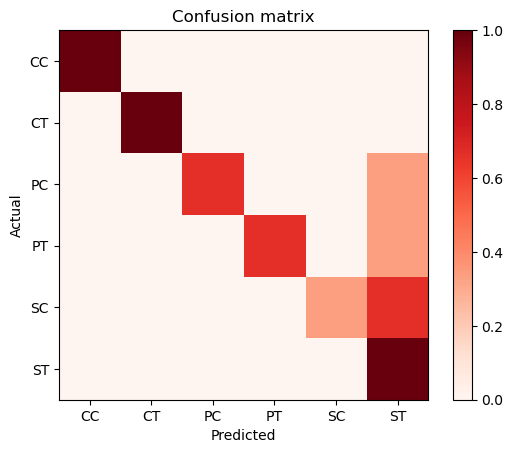

In [57]:
fig = plt.figure()
plt.imshow(confusion, cmap='Reds')
plt.xticks(range(confusion.shape[1]), confusion.columns)
plt.xlabel('Predicted')
plt.yticks(range(confusion.shape[0]), confusion.index)
plt.ylabel('Actual')
plt.colorbar()
plt.title('Confusion matrix');

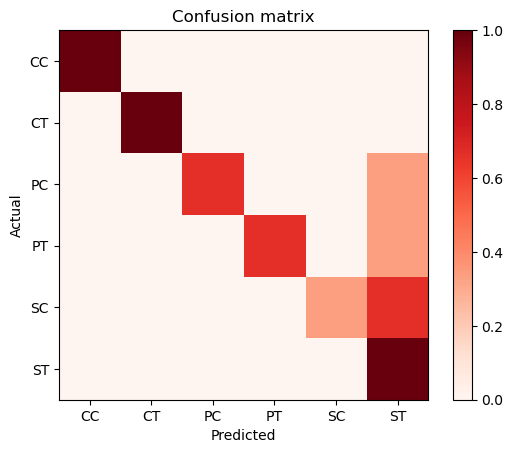

In [58]:
fig 

In [59]:
from IPython.display import Image

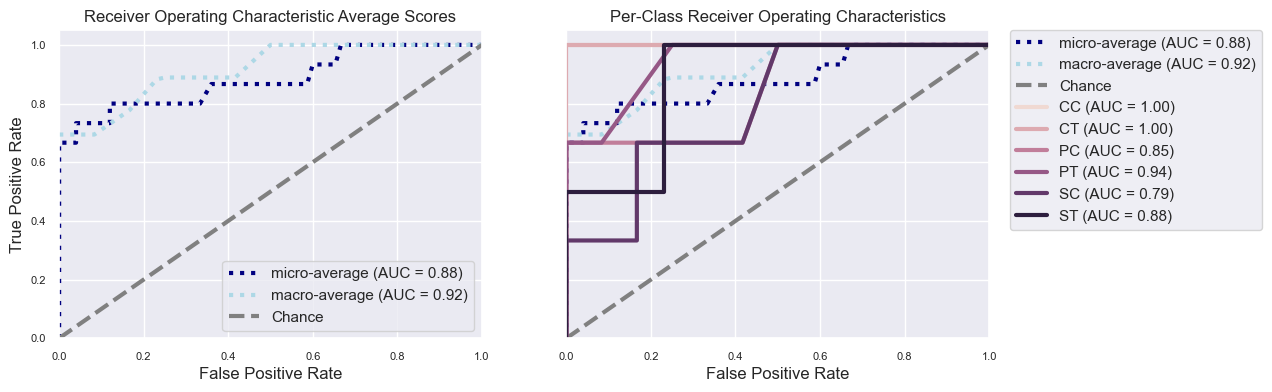

In [60]:
Image(filename=f'{arcdir}/roc_plot.png')

In [61]:
importance = model.feature_importance.view(pd.DataFrame).squeeze()
importance

id
d8fa54e2c18f2ec142fa7d70443c3dec    0.039561
337decf2cc8089ea60d4ab70c375c4a5    0.038218
28546048a604dbd02766722d7b45bfc2    0.036093
dc7529c287131ca7cc6e7a562171eaef    0.035760
5b7d5a754d492ae07433eec21f5c10a1    0.035065
                                      ...   
171582add1b88f167f02d7fab09f6513    0.000000
17280158d99c5c82ffef38f0a216279d    0.000000
17316995cd3e0bf54dc25b7e499ba8a4    0.000000
174441ce355848879907fad2171c14bd    0.000000
ff5991cc8f158b430b72562562f441b5    0.000000
Name: importance, Length: 292, dtype: float64

In [43]:
taxa = taxonomy.view(pd.DataFrame)
taxa.head()

,Taxon,Confidence
Feature ID,,
TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTTTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCCTTGAAACTGGGAAGCTAGAATCTTGGAGAGGCGAGTGGAATTCCGAG,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Erythrobacteraceae; g__Erythromicrobium,0.9256492441502662
TACGAAGGGGGCTAGCGTTGTTCGGAATCACTGGGCGTAAAGCGCACGTAGGCGGATTTGTTAGTCAGGGGTGAAATCCCGGGGCTCAACCTCGGAACTGCCTCTGATACTGCAGATCTCGAGTCCGATAGAGGTGAGTGGAATTCCTAG,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Hyphomicrobiaceae; g__Hyphomicrobium; s__,0.8832932950893545
TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTTAGAGGTGAAAGCCTGGAGCTCAACTCCAGAATTGCCTTTAAGACTGCATCGCTTGAATCCAGGAGAGGTGAGTGGAATTCCGAG,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas,0.9779050988587741
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGAGCGTAGGTTGCTCGATAAGTCAGTGGTGAAAGCCCAGAGCTCAACTCTGGAACTGCCATTGAAACTGTCGAGCTGGAATCTCAGAGGGGGTAGCGGAATTCCAAA,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__; f__; g__; s__,0.9737465963049655
TACGAAGGGGACTAGCGTTGTTCGGAATCACTGGGCGTAAAGCGCACGTAGGCGGATTTGTTAGTCGGGGGTGAAATCCCGGGGCTCAACCTCGGAACTGCCTTTGATACTGCAAGTCTCGAGTCCGATAGAGGTGGGTGGAATTCCTAG,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Hyphomicrobiaceae; g__Hyphomicrobium; s__,0.991021806616787


In [63]:
taxa.loc['TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTTTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCCTTGAAACTGGGAAGCTAGAATCTTGGAGAGGCGAGTGGAATTCCGAG']

NameError: name 'taxa' is not defined

In [64]:
model.heatmap

<visualization: Visualization uuid: f454b003-1d09-4b80-8582-44c3257ac066>

In [65]:
model.model_summary

<visualization: Visualization uuid: 55f3d752-fd55-4eaa-8672-ae8fc5b42661>

## visualization

In [66]:
from qiime2 import Visualization


In [93]:
table_qzv = Visualization.load('table.qzv')

In [94]:
table_qzv

<visualization: Visualization uuid: 1d16611e-af08-4612-9646-aebbf84954a7>

In [67]:
barplot = Visualization.load('barplot.qzv')

In [68]:
barplot

<visualization: Visualization uuid: 3fb6df9c-466f-4d62-a3c9-fae367bd0061>

In [ ]:
repseq = Visualization.load('10251rep-seqs.qzv')

#### Faith Phylogenetic Diversity

In [69]:
faith_pd_group_significance = Visualization.load('all_in_one/faith-pd-group-significance.qzv')

In [70]:
faith_pd_group_significance

<visualization: Visualization uuid: 49b4fcda-c69c-4e02-85d9-dc1ae025ec4d>

In [71]:
ancom_experiment_title = Visualization.load('ancom-experiment_title.qzv')

In [72]:
ancom_experiment_title

<visualization: Visualization uuid: 0d053b99-18df-4f24-b6ec-8a1c6b884ec2>

#### Alpha and beta diversity analysis Visualization

In [73]:
unweighted_unifrac_emperor = Visualization.load('all_in_one/unweighted_unifrac_emperor.qzv')

In [74]:
unweighted_unifrac_emperor

<visualization: Visualization uuid: 3edfbd5d-31f8-4b6f-aefa-7a7ae248ff2d>

In [34]:
weighted_unifrac_emperor = Visualization.load('all_in_one/weighted_unifrac_emperor.qzv')

In [35]:
weighted_unifrac_emperor

<visualization: Visualization uuid: e7ba8fb4-40cb-472e-842d-6d2160c0545f>

In [38]:
jaccard_emperor = Visualization.load('all_in_one/jaccard_emperor.qzv')

In [39]:
jaccard_emperor

<visualization: Visualization uuid: ccf4718c-09c9-4727-9ba8-d1ef87cf0d19>

In [40]:
bray_curtis_emperor = Visualization.load('all_in_one/bray_curtis_emperor.qzv')

In [41]:
bray_curtis_emperor

<visualization: Visualization uuid: d2688815-4292-4c23-aeba-23f8b51c9540>

#### Evenness metrics Visualization

In [75]:
evenness_group_significance = Visualization.load('all_in_one/evenness-group-significance.qzv')

In [76]:
evenness_group_significance

<visualization: Visualization uuid: f04c3e3c-92fe-485d-b2dc-588cf3b45a22>

#### Beta Diversity: unweighted UniFrac distances Visualization

In [77]:
unweighted_unifrac_expermint_title_significance = Visualization.load('all_in_one/unweighted-unifrac-expermint-title-significance.qzv')

In [78]:
unweighted_unifrac_expermint_title_significance

<visualization: Visualization uuid: 4725c0f5-7f9a-492c-aa95-b96f53c5b3a1>

#### Alpha group significance Visualization
 

In [79]:
observed_features_group_significance = Visualization.load('observed_features_group_significance.qzv')

In [80]:
observed_features_group_significance

<visualization: Visualization uuid: 5936024a-da5d-4f62-a1c4-5c45f8eb99ae>

In [81]:
shannon_group_significance = Visualization.load('shannon_group_significance.qzv')

In [82]:
shannon_group_significance

<visualization: Visualization uuid: 696e4829-c845-4343-8a26-be87aeb97cdd>

In [ ]:
pielou_e_group_significance = Visualization.load('pielou_e_group_significance.qzv')

In [ ]:
pielou_e_group_significance

In [ ]:
faith_pd_group_significance = Visualization.load('faith_pd_group_significance.qzv')

In [ ]:
faith_pd_group_significance

#### Alpha rarefaction plotting Visualization

In [83]:
alpha_rarefaction = Visualization.load('alpha-rarefaction.qzv')

In [84]:
alpha_rarefaction

<visualization: Visualization uuid: d61ac22e-5539-4b35-a4a4-801724dbb78b>

#### PCoA EMPeror Visualization
 

In [52]:
jaccard_emperor = Visualization.load('jaccard_emperor.qzv')

In [53]:
jaccard_emperor

<visualization: Visualization uuid: 93babb3e-976f-4aed-bdf5-c63db1eaf0f1>

In [138]:
braycurtis_emperor = Visualization.load('braycurtis_emperor.qzv')

In [139]:
braycurtis_emperor

<visualization: Visualization uuid: 3051ef06-81f9-4f2d-b216-704fc26daf38>

In [54]:
unweighted_unifrac_emperor = Visualization.load('unweighted_unifrac_emperor.qzv')

In [55]:
unweighted_unifrac_emperor

<visualization: Visualization uuid: b9fcd84d-6985-43e5-9d93-05c943c81ae5>

In [56]:
weighted_unifrac_emperor = Visualization.load('weighted_unifrac_emperor.qzv')

In [57]:
weighted_unifrac_emperor

<visualization: Visualization uuid: 463887d3-c512-4f35-adb9-7876cd7f3995>

#### Beta rarefaction Visualization

In [58]:
unweighted_unifrac_rarefaction = Visualization.load('unweighted_unifrac_rarefaction.qzv')

In [59]:
unweighted_unifrac_rarefaction

<visualization: Visualization uuid: ddfa0e3b-ae45-499a-acdf-21520c846d84>

#### PCoA biplot


In [85]:
unweighted_unifrac_emperor_biplot = Visualization.load('unweighted_unifrac_emperor_biplot.qzv')

In [86]:
unweighted_unifrac_emperor_biplot

<visualization: Visualization uuid: ead91df5-6903-485a-bfee-03e95954ba9c>

In [87]:
unweighted_unifrac_body_site_adonis = Visualization.load('unweighted_unifrac_body_site_adonis.qzv')

In [88]:
unweighted_unifrac_body_site_adonis

<visualization: Visualization uuid: 8465949a-1aa4-4f21-a3df-f5800b538730>

#### Mantel test

In [89]:
bc_vs_wu_mantel = Visualization.load('bc_vs_wu_mantel.qzv')

In [90]:
bc_vs_wu_mantel

<visualization: Visualization uuid: 4eead68b-514e-4beb-a3df-a08478833e2a>

#### Procrustes analysis

In [91]:
bc_vs_wu_procrustes = Visualization.load('bc_vs_wu_procrustes.qzv')

In [92]:
bc_vs_wu_procrustes

<visualization: Visualization uuid: 55467d2e-0534-4f1e-a372-c2e91e3c08a0>